In [1]:
import numpy as np
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt

### Download the database

In [2]:
!curl -L -o "C:\\Users\\bruno\\OneDrive - poli.ufrj.br\\Analise de dados\\Github\\Covid-19 India\\covid19-india.sqlite\\covid19-india.db" "https://www.dropbox.com/s/hbe04q6vtzapdam/covid-india.db?dl=1"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   121    0   121    0     0    155      0 --:--:-- --:--:-- --:--:--   155

100   363  100   363    0     0    275      0  0:00:01  0:00:01 --:--:--   275
100   363  100   363    0     0    275      0  0:00:01  0:00:01 --:--:--     0

  0 60.2M    0 15624    0     0   6824      0  2:34:12  0:00:02  2:34:10  6824
 12 60.2M   12 7744k    0     0  2407k      0  0:00:25  0:00:03  0:00:22 8337k
 55 60.2M   55 33.2M    0     0  7883k      0  0:00:07  0:00:04  0:00:03 16.3M
 79 60.2M   79 47.9M    0     0  9397k      0  0:00:06  0:00:05  0:00:01 16.3M
100 60.2M  100 60.2M    0     0  10.2M      0  0:00:05  0:00:05 --:--:-- 16.9M


### Create table to see data definition 

In [3]:
con = sqlite3.connect("C:\\Users\\bruno\\OneDrive - poli.ufrj.br\\Analise de dados\\Github\\Covid-19 India\\covid19-india.sqlite\\covid19-india.sqlite")
table = pd.read_sql_query("SELECT sql FROM sqlite_master WHERE type='table'",con)
con.close()

### Create function to acess data

In [4]:
def run_query(querystr:str) -> list:
    con = sqlite3.connect("C:\\Users\\bruno\\OneDrive - poli.ufrj.br\\Analise de dados\\Github\\Covid-19 India\\covid19-india.sqlite\\covid19-india.sqlite")
    cursor = con.cursor()
    cursor.execute(querystr)
    data = cursor.fetchall()
    con.close()
    return data


## Daily new cases

In [5]:
querystr = 'SELECT WB.date AS date, WB.cases_new AS WB,TG.cases_new AS TG, DL.cases_positive as DL, KL.positive_cases AS KL ' + \
'FROM WB_case_info WB JOIN TG_case_info TG ON WB.date == TG.date ' + \
'JOIN DL_case_info DL ON WB.date == DL.date ' + \
'JOIN KL_daily_summary KL ON WB.date == KL.date ORDER BY date' 

data = run_query(querystr)
data = pd.DataFrame(data, columns= ['Date','WB','TG','DL','KL'])
data.head(10)
print(data.isnull().sum())

Date     0
WB       0
TG       0
DL      26
KL       0
dtype: int64


### Handling NaN 

In [6]:
data_clean = data.dropna(inplace= False, axis=0)
print(data_clean.isnull().sum())

Date    0
WB      0
TG      0
DL      0
KL      0
dtype: int64


<Axes: title={'center': 'Daily new confirmed cases'}, xlabel='Date'>

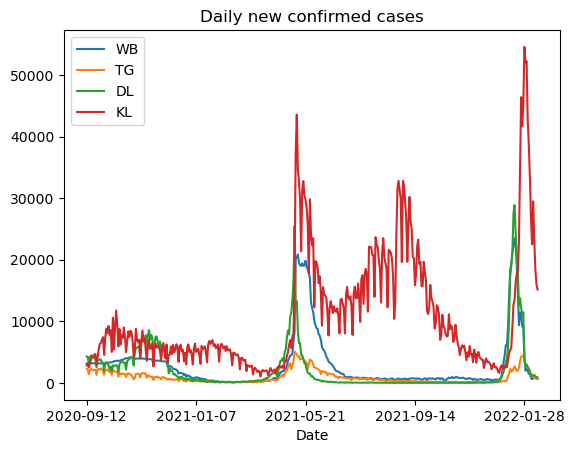

In [7]:
data_clean.plot(x='Date',title= 'Daily new confirmed cases')

## Vaccination results

In [8]:
queryVaccination = 'SELECT WB.date AS date, WB.cumulative_vax + DL.vax_cumulative  AS "Cumulative vaccines", WB2.deaths_new + DL2.deaths AS "New Deaths"  ' + \
'FROM WB_vaccination WB JOIN DL_vaccination DL ON WB.date == DL.date JOIN WB_case_info WB2 ON WB.date == WB2.date ' + \
'JOIN DL_case_info DL2 ON WB.date == DL2.date ORDER BY date'

dataVacc = run_query(queryVaccination)
dataVacc = pd.DataFrame(dataVacc, columns= ['Date', 'Total vaccines', 'Daily deaths'])
dataVacc.head(10)
print(dataVacc.isnull().sum())

Date               0
Total vaccines    21
Daily deaths      21
dtype: int64


### Handling NaN 

In [9]:
dataVaccClean = dataVacc.dropna(inplace= False, axis= 0)
print(dataVaccClean.isnull().sum())

Date              0
Total vaccines    0
Daily deaths      0
dtype: int64


<Axes: xlabel='Total vaccines', ylabel='Daily deaths'>

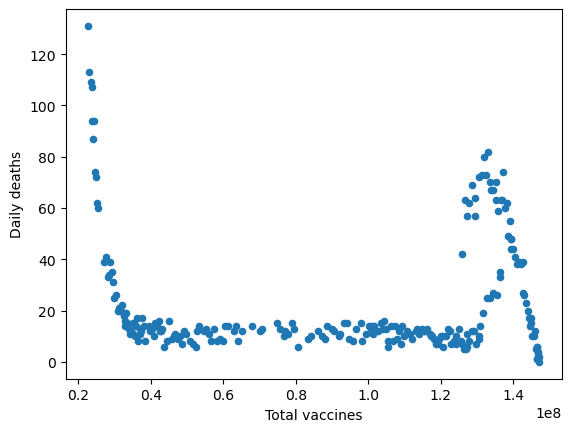

In [10]:
dataVaccClean.plot(x='Total vaccines',y='Daily deaths', kind='scatter', title='')